In [1]:
import numpy
from matplotlib import pyplot
from matplotlib import colors
% matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.split(os.getcwd())[0])

In [3]:
import utils.poly as poly
import utils.quadrature as quad

### Fig 4.1 (a)

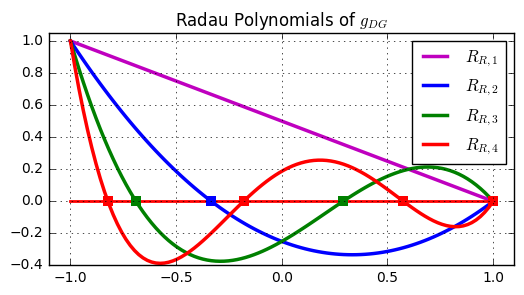

In [4]:
x = numpy.linspace(-1., 1., 100)

pyplot.figure(figsize=(6, 3))
p = [poly.Radau(k, end=1) for k in range(1, 5)]
pyplot.plot(x, p[0](x), 'm-', lw=2.5, label=r'$R_{R,1}$')
pyplot.plot(x, p[1](x), 'b-', lw=2.5, label=r'$R_{R,2}$')
pyplot.plot(x, p[2](x), 'g-', lw=2.5, label=r'$R_{R,3}$')
pyplot.plot(x, p[3](x), 'r-', lw=2.5, label=r'$R_{R,4}$')
pyplot.plot(x, numpy.zeros(100), 'r-', lw=2)
pyplot.plot(p[0].roots, numpy.zeros(1), 'ms', markersize=7, markeredgecolor='none')
pyplot.plot(p[1].roots, numpy.zeros(2), 'bs', markersize=7, markeredgecolor='none')
pyplot.plot(p[2].roots, numpy.zeros(3), 'gs', markersize=7, markeredgecolor='none')
pyplot.plot(p[3].roots, numpy.zeros(4), 'rs', markersize=7, markeredgecolor='none')
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-0.4, 1.05)
pyplot.grid()
pyplot.legend()
pyplot.title("Radau Polynomials of " + r'$g_{DG}$')

### Fig 4.1 (b)

In [5]:
gDG = poly.Radau(4, end=1)

SGnodes = -numpy.cos(numpy.arange(5)*numpy.pi/4)
gSG = poly.Lagrange(SGnodes, numpy.array([1]+4*[0]))

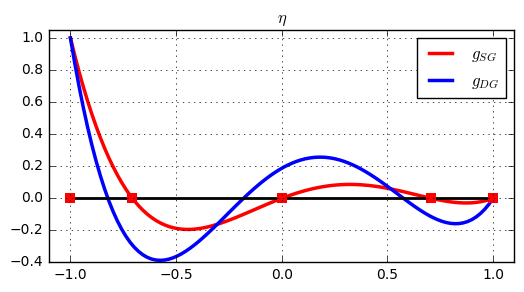

In [6]:
pyplot.figure(figsize=(6, 3))
pyplot.plot(x, gSG(x), 'r-', lw=2.5, label=r'$g_{SG}$')
pyplot.plot(x, gDG(x), 'b-', lw=2.5, label=r'$g_{DG}$')
pyplot.plot(x, numpy.zeros(100), 'k-', lw=2)
pyplot.plot(SGnodes, numpy.zeros(5), 'rs', markersize=7, markeredgecolor='none')
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-0.4, 1.05)
pyplot.grid()
pyplot.legend()
pyplot.title(r'$\eta$')

### Fig 4.2 (a)

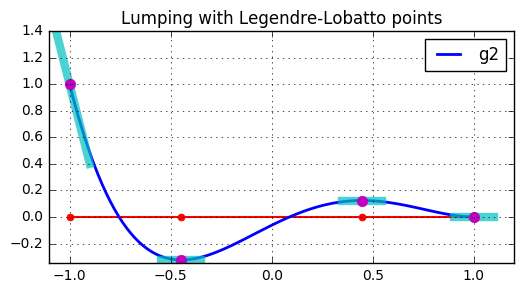

In [7]:
nodes = quad.GaussLobattoJacobi(4).nodes
g2 = (3. * poly.Radau(4, end=1) + 4. * poly.Radau(3, end=1)) / 7.

x = numpy.linspace(-1., 1., 100)
xd = numpy.linspace(-0.1, 0.1, 20)

pyplot.figure(figsize=(6, 3))
pyplot.plot(nodes, numpy.zeros(4), 'r.-', lw=1.5, markersize=10)
pyplot.plot(x, g2(x), 'b-', lw=2, label='g2')
for i in range(4):
    a = g2.derive()(nodes[i])
    f = lambda xi: a * xi + g2(nodes[i]) - a * nodes[i]
    pyplot.plot(xd+nodes[i], f(xd+nodes[i]), 'c-', lw=6, alpha=0.7)
pyplot.plot(nodes, g2(nodes), 'm.', markersize=15)
pyplot.title("Lumping with Legendre-Lobatto points")
pyplot.xlim(-1.1, 1.2)
pyplot.ylim(-0.35, 1.4)
pyplot.grid()
pyplot.legend(loc=0)

### Fig 4.2 (b)

In [8]:
def ChebyshevLobatto(K):
    """return K Chebyshev-Lobatto points"""
    return - numpy.cos(numpy.arange(K) * numpy.pi / (K - 1))

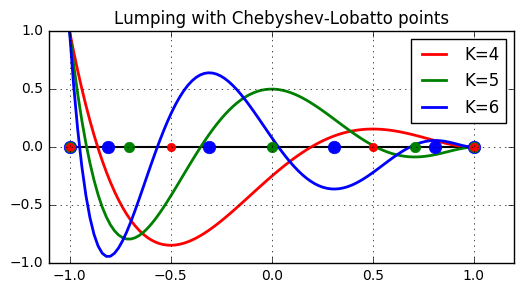

In [9]:
x = numpy.linspace(-1., 1., 100)
color = {4: 'r', 5: 'g', 6: 'b'}

pyplot.figure(figsize=(6, 3))
pyplot.plot(x, numpy.zeros(100), 'k-', lw=1.5)

for k in [4, 5, 6]:
    nodes = ChebyshevLobatto(k)
    dg2 = poly.Polynomial(roots=nodes[1:])
    g2 = dg2.integral()
    g2 = (g2 - g2(1)) / (g2(-1) - g2(1))
    
    pyplot.plot(x, g2(x), color[k]+'-', lw=2, label='K={0}'.format(k))

for k in [6, 5, 4]:
    nodes = ChebyshevLobatto(k)
    pyplot.plot(nodes, numpy.zeros(k), color[k]+'.', markersize=3*k)

pyplot.title("Lumping with Chebyshev-Lobatto points")
pyplot.xlim(-1.1, 1.2)
pyplot.ylim(-1., 1.)
pyplot.grid()
pyplot.legend(loc=0)

### Fig 4.3 (a)

In [10]:
K = 4
g1 = poly.Radau(K, end=1)
g2 = ((K - 1) * poly.Radau(K, end=1) + 
      K * poly.Radau(K-1, end=1)) / (2 * K - 1)
g3 = (-1 if K % 2 else 1) * (K + 1) * numpy.power(0.5, K) * \
    poly.Polynomial(roots=[(1-K)/(K+1)]) * \
    poly.Polynomial(roots=[1]*(K-1))
g4 = (-1 if K % 2 else 1) * numpy.power(0.5, K) * \
    poly.Polynomial(roots=[1]*K)

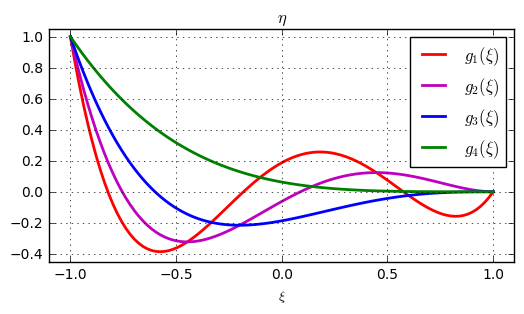

In [11]:
x = numpy.linspace(-1., 1., 100)

pyplot.figure(figsize=(6, 3))
pyplot.plot(x, g1(x), 'r-', lw=2, label=r'$g_1(\xi)$')
pyplot.plot(x, g2(x), 'm-', lw=2, label=r'$g_2(\xi)$')
pyplot.plot(x, g3(x), 'b-', lw=2, label=r'$g_3(\xi)$')
pyplot.plot(x, g4(x), 'g-', lw=2, label=r'$g_4(\xi)$')
pyplot.title(r'$\eta$')
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-0.45, 1.05)
pyplot.xlabel(r'$\xi$')
pyplot.grid()
pyplot.legend(loc=0)

### Fig 4.3 (b)

In [12]:
K = 4

nodesSG = ChebyshevLobatto(K+1)
gSG = poly.Lagrange(nodesSG, numpy.array([1.]+[0.]*K))

nodesLo = quad.GaussLobattoJacobi(K+1).nodes
gLo = poly.Lagrange(nodesLo, numpy.array([1.]+[0.]*K))

nodesGa = numpy.zeros(K+1)
nodesGa[0] = -1.
nodesGa[1:-1] = quad.GaussJacobi(K-1).nodes
nodesGa[-1] = 1.
gGa = poly.Lagrange(nodesGa, numpy.array([1.]+[0.]*K))

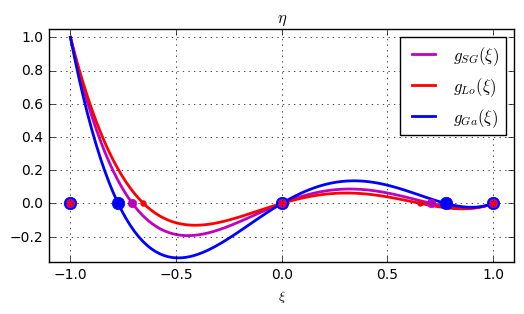

In [14]:
x = numpy.linspace(-1., 1., 100)

pyplot.figure(figsize=(6, 3))
pyplot.plot(x, gSG(x), 'm-', lw=2, label=r'$g_{SG}(\xi)$')
pyplot.plot(x, gLo(x), 'r-', lw=2, label=r'$g_{Lo}(\xi)$')
pyplot.plot(x, gGa(x), 'b-', lw=2, label=r'$g_{Ga}(\xi)$')
pyplot.plot(nodesGa, numpy.zeros(K+1), 'b.', markersize=18)
pyplot.plot(nodesSG, numpy.zeros(K+1), 'm.', markersize=12)
pyplot.plot(nodesLo, numpy.zeros(K+1), 'r.', markersize=8)
pyplot.title(r'$\eta$')
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-0.35, 1.05)
pyplot.xlabel(r'$\xi$')
pyplot.grid()
pyplot.legend(loc=0)